# **Thailand Tourism Data Analysis**

<a id="table-of-contents"></a>

# Table of Contents

1. [Introduction](#1-introduction)
    - [Data Source](#data-source)
    - [Dataset Overview](#dataset-overview)
2. [Data Loading and Preprocessing](#2-data-loading-and-preprocessing)
    - [Import Libraries](#import-libraries)
    - [Load the Data](#load-the-data)
    - [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
    - [Statistical Overview](#Statistical-Overview)
    - [Time Series Analysis](#Time-Series-Analysis)
    - [Country-wise Analysis](#Country-wise-Analysis)
4. [Data Visualization](#4-data-visualization)
    - [Trend Over Time](#Trend-Over-Time)
    - [Geographical Distribution](#Geographical-Distribution)
    - [Category-wise Spending](#Category-wise-Spending)
5. [Conclusions](#5-conclusions)

<a id="1-introduction"></a>

# 1. Introduction

[Table of Contents](#table-of-contents)

This Jupyter Notebook is part of the project 'Thailand Tourism Dashboard'. 
It focuses on the exploratory data analysis (EDA) of tourism data in Thailand, 
covering the period from January 2015 to July 2023.

## Objective
- To understand tourism trends in Thailand.
- To analyze spending patterns of tourists.
- To prepare data for building an interactive dashboard.

<a id="data-source"></a>

## Data Source
The dataset is sourced from the [Thailand Tourism Trend](https://data.go.th/en/dataset/trend_inbound_tourists) dataset, provided by the Ministry of Tourism and Sports, Thailand.

- Data Key: 445c66d8-a06a-49d9-adfc-35faca6fc785
- Tags: จำนวนนักท่องเที่ยวชาวต่างชาติ, สถิตินักท่องเที่ยวชาวต่างชาติ
- Visibility: Public
- Dataset Create Date: November 12, 2023
- Maintain Date: December 12, 2023
- Data Type: Statistical data
- Contact Person: กองเศรษฐกิจการท่องเที่ยวและกีฬา
- Contact Email: ets.mots@gmail.com
- Objective: เพื่อการให้บริการประชาชน, พันธกิจหน่วยงาน, ดัชนี/ตัวชี้วัดระดับนานาชาติ
- Update Frequency: Monthly
- Geo Coverage: Thailand
- Data Source: Office of the Permanent Secretary, Ministry of Tourism and Sports
- Data Format: Database, JSON
- Data Category: ข้อมูลสาธารณะ
- License: Open Data Common

<a id="dataset-overview"></a>

## Dataset Overview

| Column Name      | Description                                                       | Data Type    |
|------------------|-------------------------------------------------------------------|--------------|
| `YearInfo`       | The year of the record.                                           | `int`        |
| `MonthInfo`      | The month of the record.                                          | `int`        |
| `DayInfo`        | The day of the record.                                            | `int`        |
| `CountryID`      | A unique identifier for the country. (ISO 3166-1 numeric code)    | `str`        |
| `ISO`            | The 3-letter code for the country. (ISO 3166-1 alpha-3 code)      | `str`        |
| `CountryName`    | The name of the country.                                          | `str`        |
| `Status`         | The status of the data (Provisional or Finalized).                | `str`        |
| `TouristNumber`  | The number of tourists from that country on that date.            | `float`      |
| `Receipt`        | Total spending (in Million THB).                                  | `float`      |
| `Shopping`       | Spending on shopping (in Million THB).                            | `float`      |
| `Entertainment`  | Spending on entertainment (in Million THB).                       | `float`      |
| `Sightseeing`    | Spending on sightseeing (in Million THB).                         | `float`      |
| `Accommodation`  | Spending on accommodation (in Million THB).                       | `float`      |
| `Food`           | Spending on food (in Million THB).                                | `float`      |
| `LocalTransport` | Spending on local transport (in Million THB).                     | `float`      |
| `Miscellaneous`  | Spending on miscellaneous items (in Million THB).                 | `float`      |


<a id="2-data-loading-and-preprocessing"></a>

# 2. Data Loading and Preprocessing

[Table of Contents](#table-of-contents)

<a id="import-libraries"></a>

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import geopandas as gpd
from prettytable import PrettyTable

<a id="load-the-Data"></a>

## Load the Data

In [2]:
# Load the JSON data from the uploaded file
file_path = 'trend-inbound-tourists.json'

# Load the JSON data
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert the data to a DataFrame
df = pd.json_normalize(data)

# Displaying the first few rows of the DataFrame
df.head()

,YearInfo,MonthInfo,DayInfo,CountryID,ISO,CountryName,Status,TouristNumber,Receipt,Shopping,Entertainment,Sightseeing,Accommodation,Food,LocalTransport,Miscellaneous
0,2015,1,1,004,AFG,Afghanistan,F,163.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,008,ALB,Albania,F,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,012,DZA,Algeria,F,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,016,ASM,American Samoa,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,020,AND,Andorra,F,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Multiplying the expenses and receipt columns by 1,000,000
#expense_and_receipt_columns = ['Receipt', 'Shopping', 'Entertainment', 'Sightseeing', 'Accommodation', 'Food', 'LocalTransport', 'Miscellaneous']
#df[expense_and_receipt_columns] = df[expense_and_receipt_columns].multiply(1000000)

# Export to CSV
#df.to_csv('trend-inbound-tourists.csv', index=False)

<a id="data-cleaning-and-preprocessing"></a>

## Data Cleaning and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19012 entries, 0 to 19011
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearInfo        19012 non-null  int64  
 1   MonthInfo       19012 non-null  int64  
 2   DayInfo         19012 non-null  int64  
 3   CountryID       19012 non-null  object 
 4   ISO             19012 non-null  object 
 5   CountryName     19012 non-null  object 
 6   Status          19012 non-null  object 
 7   TouristNumber   12227 non-null  float64
 8   Receipt         1872 non-null   float64
 9   Shopping        1080 non-null   float64
 10  Entertainment   1080 non-null   float64
 11  Sightseeing     1080 non-null   float64
 12  Accommodation   1080 non-null   float64
 13  Food            1080 non-null   float64
 14  LocalTransport  1080 non-null   float64
 15  Miscellaneous   1080 non-null   float64
dtypes: float64(9), int64(3), object(4)
memory usage: 2.3+ MB


In [4]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Displaying missing values information
missing_values

YearInfo              0
MonthInfo             0
DayInfo               0
CountryID             0
ISO                   0
CountryName           0
Status                0
TouristNumber      6785
Receipt           17140
Shopping          17932
Entertainment     17932
Sightseeing       17932
Accommodation     17932
Food              17932
LocalTransport    17932
Miscellaneous     17932
dtype: int64

<a id="3-exploratory-data-analysis-eda"></a>

# 3. Exploratory Data Analysis (EDA)

[Table of Contents](#table-of-contents)

In [5]:
df.describe()

,YearInfo,MonthInfo,DayInfo,TouristNumber,Receipt,Shopping,Entertainment,Sightseeing,Accommodation,Food,LocalTransport,Miscellaneous
count,19012.000000,19012.000000,19012.000000,1.222700e+04,1872.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,2017.669314,6.729118,3.001578,1.714848e+04,3075.636319,796.215157,350.018630,126.308287,934.524028,680.420213,318.383028,52.487528
std,2.102221,3.267009,5.738695,6.789302e+04,6364.278696,1987.957770,605.040951,344.644885,1710.163405,1293.988857,604.484629,119.968955
min,2015.000000,1.000000,1.000000,1.000000e+00,0.520000,12.260000,2.720000,0.820000,10.390000,6.460000,2.940000,0.340000
25%,2016.000000,4.000000,1.000000,3.700000e+01,471.347500,110.007500,60.257500,15.427500,157.450000,113.437500,58.380000,5.977500
50%,2017.000000,7.000000,1.000000,3.770000e+02,1260.995000,305.270000,144.395000,42.595000,417.930000,288.650000,147.695000,17.390000
75%,2020.000000,9.000000,1.000000,6.229000e+03,3573.442500,806.397500,445.180000,108.562500,1066.085000,841.197500,357.932500,59.242500
max,2023.000000,12.000000,31.000000,1.198971e+06,59235.600000,18362.280000,4995.970000,3631.330000,14405.290000,11573.400000,5293.890000,1110.490000


In [6]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

<Figure size 1500x600 with 0 Axes>

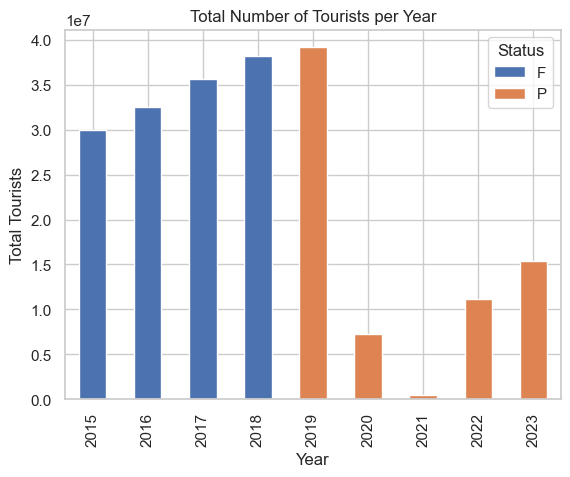

In [7]:
# Trend Analysis: Tourist numbers over the years (Assuming 'P' is Provisional and 'F' is Finalized)
status_comparison = df.groupby(['YearInfo', 'Status'])['TouristNumber'].sum().unstack().fillna(0)

plt.figure(figsize=(15, 6))
status_comparison.plot(kind='bar', stacked=True)
plt.title('Total Number of Tourists per Year')
plt.ylabel('Total Tourists')
plt.xlabel('Year')
plt.legend(title='Status')
plt.show()

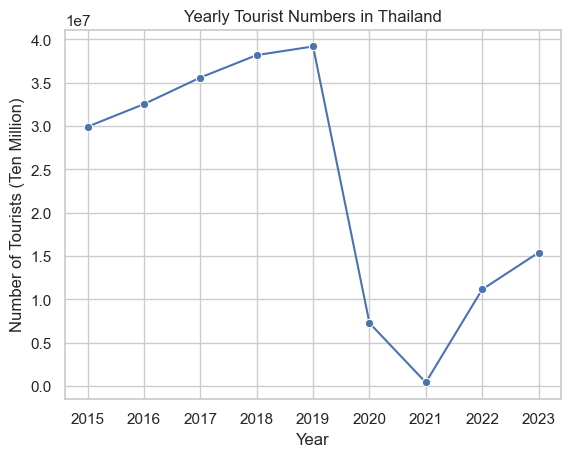

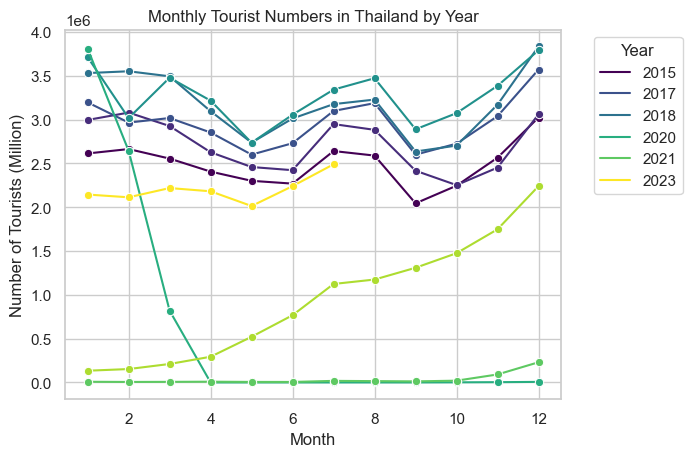

In [8]:
# Grouping data by year and month to see the overall tourist trend
yearly_tourist_data = df.groupby(['YearInfo']).agg({'TouristNumber': 'sum'}).reset_index()
monthly_tourist_data = df.groupby(['YearInfo', 'MonthInfo']).agg({'TouristNumber': 'sum'}).reset_index()

# Plotting yearly tourist numbers
sns.lineplot(data=yearly_tourist_data, x='YearInfo', y='TouristNumber', marker='o')
plt.title('Yearly Tourist Numbers in Thailand')
plt.xlabel('Year')
plt.ylabel('Number of Tourists (Ten Million)')
plt.grid(True)
plt.show()

# Plotting monthly tourist numbers
sns.lineplot(data=monthly_tourist_data, x='MonthInfo', y='TouristNumber', hue='YearInfo', palette='viridis', marker='o')
plt.title('Monthly Tourist Numbers in Thailand by Year')
plt.xlabel('Month')
plt.ylabel('Number of Tourists (Million)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<a id="4-data-visualization"></a>

# 4. Data Visualization

[Table of Contents](#table-of-contents)

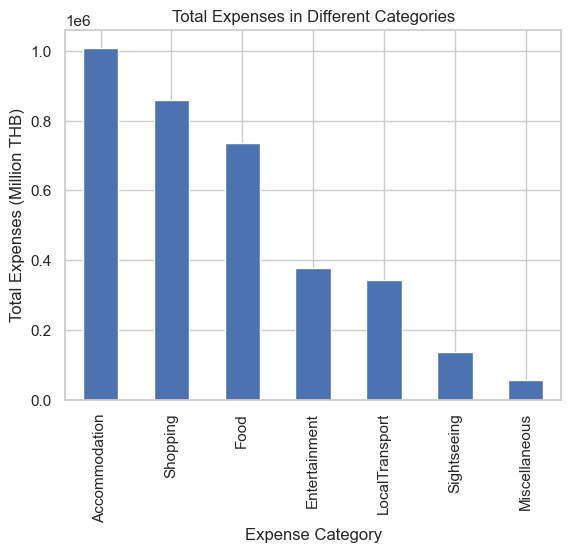

In [9]:
# Expenditure Analysis: Total expenses over the years
expense_categories = ['Shopping', 'Entertainment', 'Sightseeing', 'Accommodation', 'Food', 'LocalTransport', 'Miscellaneous']
total_expenses = df[expense_categories].sum().sort_values(ascending=False)

total_expenses.plot(kind='bar')
plt.title('Total Expenses in Different Categories')
plt.ylabel('Total Expenses (Million THB)')
plt.xlabel('Expense Category')
plt.show()

In [10]:
# Grouping data by country and calculating total receipts and total tourists
country_wise_receipts = df.groupby(['CountryName']).agg({'Receipt': 'sum', 'TouristNumber': 'sum'}).reset_index()

# Calculating expenses per person for each country (handling division by zero)
country_wise_receipts['ExpensesPerPerson'] = country_wise_receipts.apply(
    lambda row: row['Receipt'] / row['TouristNumber'] if row['TouristNumber'] > 0 else 0, axis=1)

# Sorting by ExpensesPerPerson to see the countries with the highest spending per person
sorted_expenses_per_person = country_wise_receipts.sort_values(by='ExpensesPerPerson', ascending=False)

# Displaying the top 10 countries by expenses per person
sorted_expenses_per_person.head(10)

,CountryName,Receipt,TouristNumber,ExpensesPerPerson
137,Kuwait,24051.25,363883.0,0.066096
13,Austria,81004.85,1409560.0,0.057468
186,Norway,37868.67,795994.0,0.047574
190,Others in Africa,8492.40,179941.0,0.047195
74,Denmark,48223.01,1032139.0,0.046721
246,Sweden,88534.90,1909203.0,0.046373
44,Canada,61281.66,1338864.0,0.045771
91,Finland,37831.82,827872.0,0.045698
125,Israel,52025.00,1182754.0,0.043986
212,Russian Federation,349459.50,8186125.0,0.042689


In [11]:
# Grouping data by country and calculating average spending per person for each expense category
country_expenses = df.groupby(['CountryName']).agg({**{category: 'sum' for category in expense_categories}, 'TouristNumber': 'sum'}).reset_index()

# Calculating expenses per person for each category
for category in expense_categories:
    country_expenses[f'{category}PerPerson'] = country_expenses.apply(
        lambda row: row[category] / row['TouristNumber'] if row['TouristNumber'] > 0 else 0, axis=1)

# Displaying the data for the top 10 countries by TouristNumber for illustration
top_countries_by_tourist_number = country_expenses.sort_values(by='TouristNumber', ascending=False).head(10)
top_countries_by_tourist_number[['CountryName', 'TouristNumber', *list(map(lambda x: x+'PerPerson', expense_categories))]]

,CountryName,TouristNumber,ShoppingPerPerson,EntertainmentPerPerson,SightseeingPerPerson,AccommodationPerPerson,FoodPerPerson,LocalTransportPerPerson,MiscellaneousPerPerson
53,China,51423061.0,0.006203,0.001782,0.001059,0.005105,0.003883,0.001822,0.000364
151,Malaysia,23750768.0,0.002710,0.000793,0.000246,0.002271,0.001578,0.000639,0.000137
208,Republic of Korea,9958430.0,0.002938,0.002085,0.000456,0.004665,0.003085,0.001222,0.000284
119,India,9428604.0,0.003307,0.001571,0.000515,0.003606,0.002491,0.001253,0.000249
139,Lao People's Democratic Republic,9185176.0,0.003985,0.001170,0.000149,0.002544,0.002051,0.000871,0.000082
128,Japan,8841281.0,0.002620,0.002554,0.000472,0.005482,0.003803,0.001492,0.000237
212,Russian Federation,8186125.0,0.005070,0.002404,0.000904,0.007899,0.006183,0.002527,0.000383
270,United States of America,6424581.0,0.003493,0.002888,0.001169,0.007777,0.005152,0.003142,0.000476
232,Singapore,6359268.0,0.003758,0.001289,0.000233,0.003632,0.002796,0.000945,0.000214
266,United Kingdom of Great Britain and Northern I...,6093423.0,0.002906,0.003107,0.001076,0.008093,0.005887,0.002874,0.000423


In [12]:
# Extracting top 3 countries for each expense category
top_3_per_category = {}
for category in expense_categories:
    sorted_by_category = country_expenses.sort_values(by=f'{category}PerPerson', ascending=False)
    top_3_per_category[category] = sorted_by_category[['CountryName', f'{category}PerPerson']].head(3)

# Displaying the top 3 countries for each expense category
top_3_per_category

{'Shopping':               CountryName  ShoppingPerPerson
 137                Kuwait           0.011169
 265  United Arab Emirates           0.008402
 174                 Nepal           0.007952,
 'Entertainment':               CountryName  EntertainmentPerPerson
 137                Kuwait                0.005858
 265  United Arab Emirates                0.005064
 12              Australia                0.004231,
 'Sightseeing':    CountryName  SightseeingPerPerson
 8    Argentina              0.001426
 44      Canada              0.001371
 12   Australia              0.001289,
 'Accommodation':     CountryName  AccommodationPerPerson
 137      Kuwait                0.012084
 12    Australia                0.009649
 246      Sweden                0.009556,
 'Food':     CountryName  FoodPerPerson
 137      Kuwait       0.007906
 246      Sweden       0.007347
 91      Finland       0.007121,
 'LocalTransport':     CountryName  LocalTransportPerPerson
 8     Argentina                 0

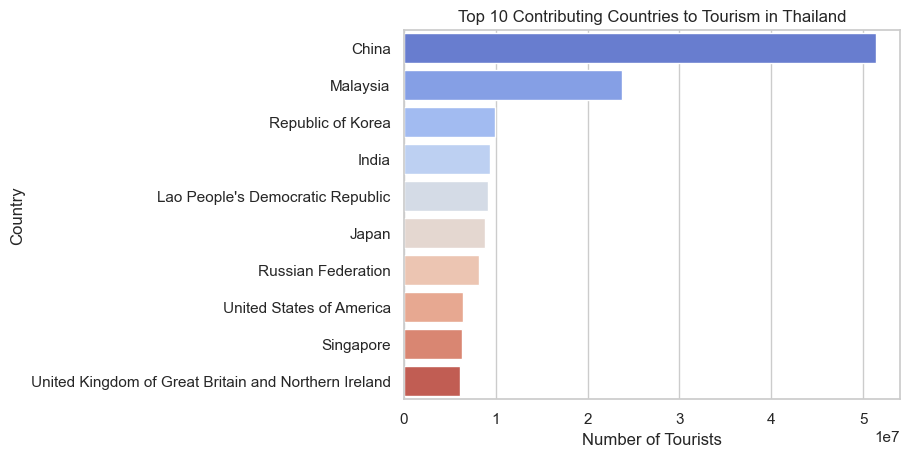

In [20]:
# Grouping data by country and summing up the number of tourists
country_wise_tourism = df.groupby(['CountryName']).agg({'TouristNumber': 'sum'}).reset_index()

# Sorting the data to find the top contributing countries
top_countries = country_wise_tourism.sort_values(by='TouristNumber', ascending=False).head(10)

# Plotting the top contributing countries
sns.barplot(data=top_countries, x='TouristNumber', y='CountryName', palette='coolwarm')
plt.title('Top 10 Contributing Countries to Tourism in Thailand')
plt.xlabel('Number of Tourists')
plt.ylabel('Country')
plt.show()

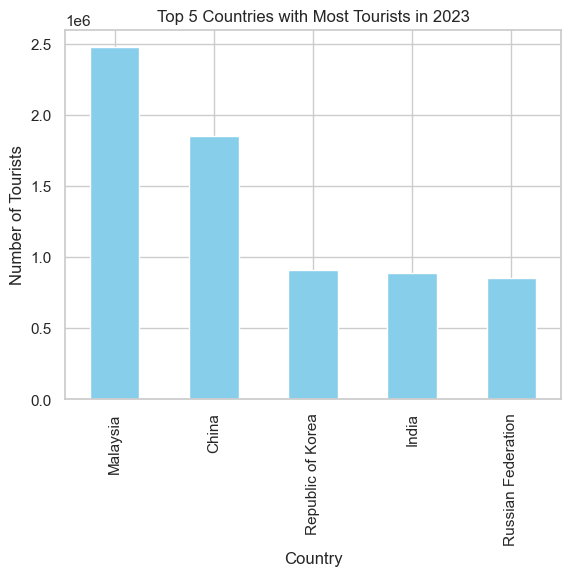

In [22]:
# Country-Specific Insights: Top 5 countries with the most tourists in the most recent year
latest_year = df['YearInfo'].max()
top_countries = df[df['YearInfo'] == latest_year].groupby('CountryName')['TouristNumber'].sum().sort_values(ascending=False).head(5)

top_countries.plot(kind='bar', color='skyblue')
plt.title(f'Top 5 Countries with Most Tourists in {latest_year}')
plt.ylabel('Number of Tourists')
plt.xlabel('Country')
plt.show()


## Geographical Distribution

In [12]:
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/Users/Vitchakorn/anaconda3/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


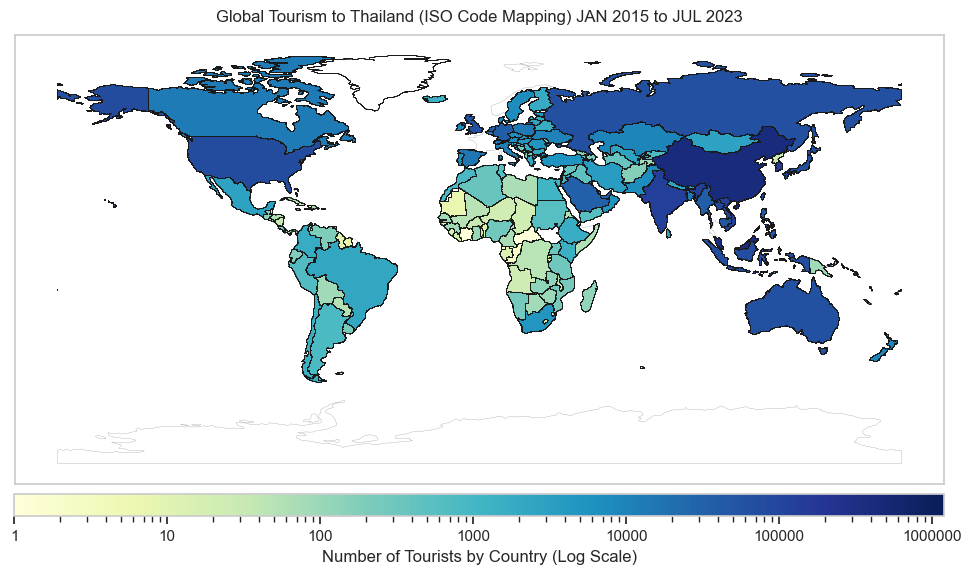

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Merge the tourism data with the world geometry using ISO codes
tourism_map_iso = world.merge(df, how="left", left_on="iso_a3", right_on="ISO")

# Adjust the figure size and plot with a logarithmic color scale
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)  # Reduced size for scale

tourism_map_iso.boundary.plot(ax=ax, linewidth=0.1, color='k')  # Reduced border line width
tourism_map_iso.plot(column='TouristNumber', ax=ax, legend=True,
                     legend_kwds={'label': "Number of Tourists by Country (Log Scale)",
                                  'orientation': "horizontal",
                                  'cax': cax,
                                  'format': "%.0f"},
                     cmap='YlGnBu',
                     edgecolor='k', linewidth=0.1,  # Reduced border line width
                     norm=colors.LogNorm(vmin=df['TouristNumber'].min(), vmax=df['TouristNumber'].max()))

# Remove grid and y-axis numbers
ax.grid(False)
ax.set_xticks([])  # Remove the x-axis numbers
ax.set_yticks([])  # Remove the y-axis numbers

# Move the title to the top of the plot
plt.title('Global Tourism to Thailand (ISO Code Mapping) JAN 2015 to JUL 2023', pad=340)

plt.show()

<a id="5-conclusions"></a>

# 5. Conclusions

[Table of Contents](#table-of-contents)